# Lab9 Example 
## Example I: More functions of Set
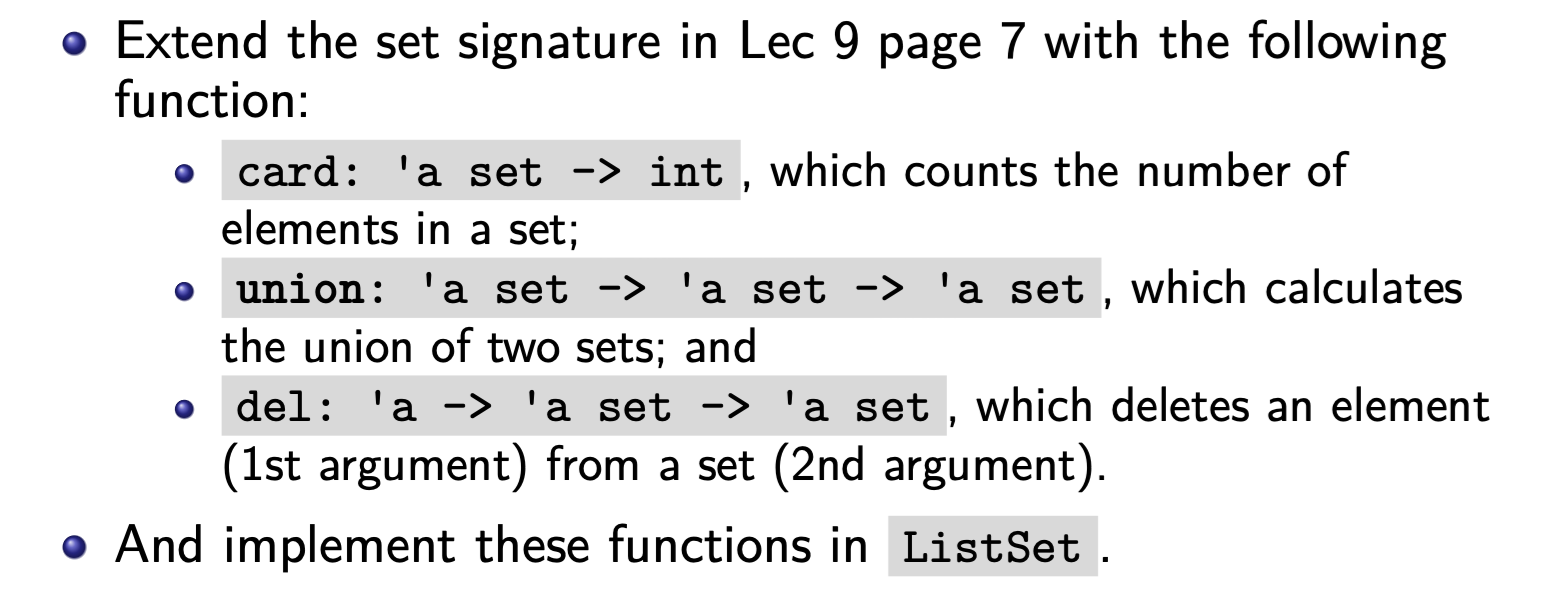

In [2]:
module type Set = sig
  type 'a set
  val empty : 'a set
  val membership : 'a -> 'a set -> bool
  val add: 'a -> 'a set -> 'a set
  val card: 'a set -> int
  val union: 'a set -> 'a set -> 'a set 
  val del: 'a -> 'a set -> 'a set 
end;;

module ListSet : Set with
  type 'a set = 'a list = struct
  type 'a set = 'a list
  let empty : 'a set = []
  let rec membership e = function
    | [] -> false
    | h :: t -> h = e || membership e t
  let rec add e = function
    | [] -> [e]
    | h :: t -> if h = e then h :: t else h :: add e t
  let rec card = function
    | [] -> 0
    | _ ::t -> 1 + card t  
  let rec union s1 = function
    | [] -> s1
    | [x] -> add x s1  
    | s :: t -> union (add s s1) t
  let rec del e = function
    | [] ->  []
    | h::t -> if h = e then t else h :: del e t
end;;



module type Set =
  sig
    type 'a set
    val empty : 'a set
    val membership : 'a -> 'a set -> bool
    val add : 'a -> 'a set -> 'a set
    val card : 'a set -> int
    val union : 'a set -> 'a set -> 'a set
    val del : 'a -> 'a set -> 'a set
  end


module ListSet :
  sig
    type 'a set = 'a list
    val empty : 'a set
    val membership : 'a -> 'a set -> bool
    val add : 'a -> 'a set -> 'a set
    val card : 'a set -> int
    val union : 'a set -> 'a set -> 'a set
    val del : 'a -> 'a set -> 'a set
  end


## Example II: Efficient Set
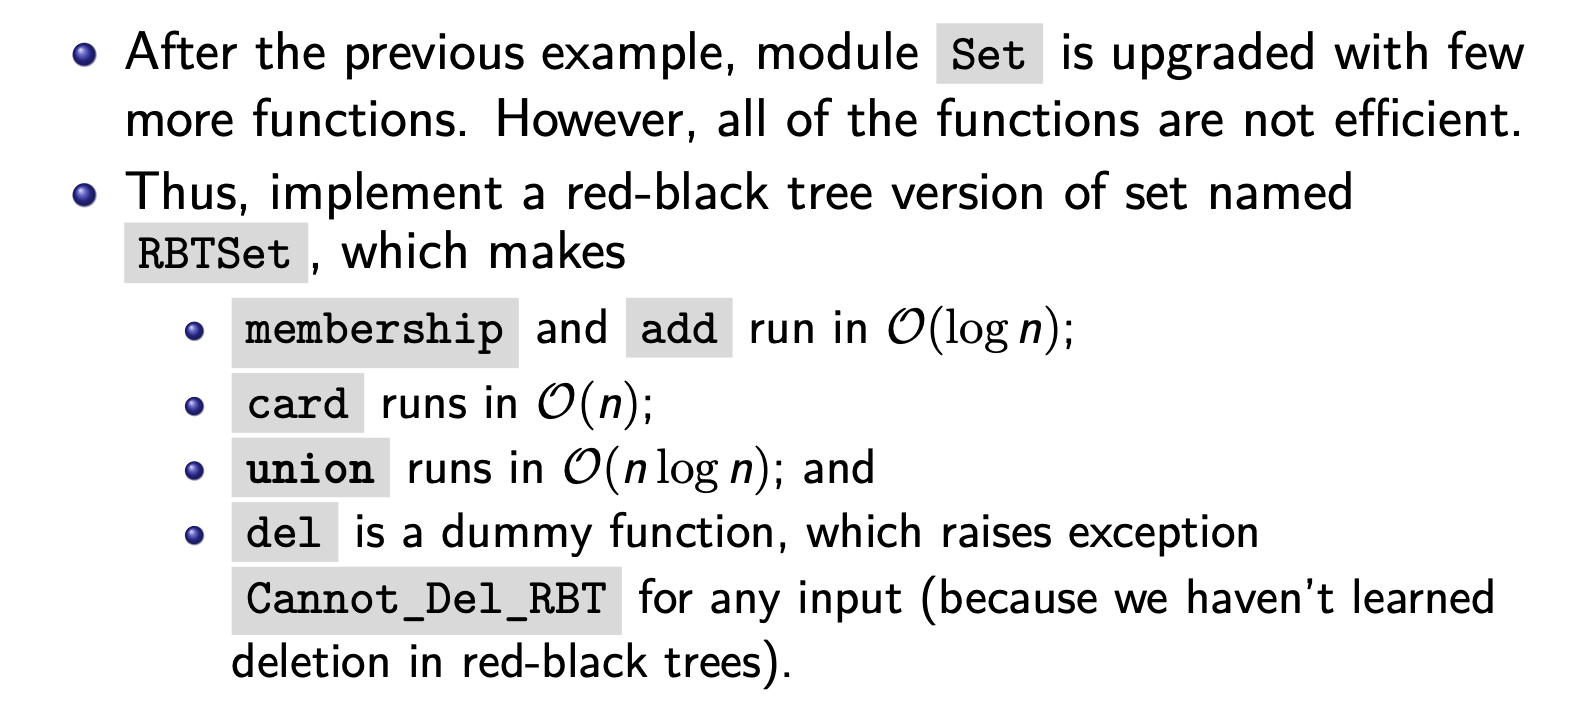

In [ ]:
module type Tree = sig 
  type 'a tree 
  exception Insertion_Failure
  val mem : 'a -> 'a tree -> bool 
  val insert : 'a -> 'a tree -> 'a tree 
end;;

type color = Red | Black;;
type 'a rbtree = Leaf | Node of color * 'a * 'a rbtree * 'a rbtree ;;

module RBTree : Tree with 
  type 'a tree = 'a rbtree = struct 
    type 'a tree = 'a rbtree
    exception Insertion_Failure
    let rec mem e = function 
      | Leaf -> false
      | Node (c, v, l, r) -> 
        if e = v then true 
        else if e < v then mem e l 
        else mem e r 
    let rebalance = function 
      | Black, n2, Node(Red, n1, Node(Red, n0, a, b), c), d 
      | Black, n2, Node(Red, n0, a, Node(Red, n1, b, c)), d 
      | Black, n0, a, Node(Red, n1, b, Node(Red, n2, c, d))
      | Black, n0, a, Node(Red, n2, Node(Red, n1, b, c), d)
        -> Node(Red, n1, Node(Black, n0, a, b), Node(Black, n2, c, d))
      | c, n, l, r -> Node(c, n, l, r)
    let rec ins_helper e = function 
      | Leaf -> Node(Red, e, Leaf, Leaf)
      | Node(c, v, l, r) ->
        if e < v then 
          rebalance(c, v, ins_helper e l, r)
        else if e > v then 
          rebalance(c, v, l, ins_helper e r) 
        else Node(c, v, l, r) 
    let insert e n = 
      match ins_helper e n with 
      | Node(_, v, l, r) -> Node(Black, v, l, r)
      | _ -> raise Insertion_Failure 
  end;;

module RBTSet : Set with 
  type 'a set = 'a rbtree  = struct 
    type 'a set = 'a rbtree 
    let empty = Leaf 
    let membership = RBTree.mem 
    let add = RBTree.insert 
    let rec card = function 
      | Leaf -> 0
      | Node (_, _, l, r) -> 1 + (card l) + (card r) 
    exception Cannot_Del_RBT
    let del e s = raise Cannot_Del_RBT 
    let rec union s1 = function 
      | Leaf -> s1
      | Node(_, v, l, r) -> add v (union (union s1 l) r) 
end;;


In [ ]:
module type Tree = sig
  type 'a tree
  val empty : 'a tree
  val mem : 'a -> 'a tree -> bool
  val insert: 'a -> 'a tree -> 'a tree
  val card: 'a tree -> int
  val union: 'a tree -> 'a tree -> 'a tree 
  val del: 'a -> 'a tree -> 'a tree 
end;;

(* module RBtree: Tree  with
type 'a  = 'a list  *)

type color = Red | Black;;

type 'a rbtree =
  | Leaf
  | Node of color *'a *'a rbtree *'a rbtree;;

let rec rbmem e = function
  | Leaf -> false
  | Node (_, v, l, r) ->
  if e = v then true
  else if e < v then rbmem e l
  else rbmem e r;;

let rebalance = function
  | Black, n2, Node(Red, n1, Node(Red, n0, a, b), c), d | Black, n2, Node(Red, n0, a, Node(Red, n1, b, c)), d 
  | Black, n0, a, Node(Red, n1, b, Node(Red, n2, c, d)) | Black, n0, a, Node(Red, n2, Node(Red, n1, b, c), d)
  -> Node(Red, n1, Node(Black, n0, a, b), Node(Black, n2, c, d))
  | c, n, l, r -> Node(c, n, l, r);;

let rec ins_helper e = function
  | Leaf -> Node(Red, e, Leaf, Leaf)
  | Node (c, v, l, r) ->
    if e < v then
      rebalance (c, v, ins_helper e l, r)
    else if e > v then
      rebalance (c, v, l, ins_helper e r)
    else Node(c, v, l, r);;

exception Insertion_Failure;;

exception Cannot_Del_RBT;;

let insert e n =
  match ins_helper e n with
  | Node (_, v, l, r) -> Node (Black, v, l, r)
  | _ -> raise Insertion_Failure;;

module RBTSet : Set with
  type 'a set = 'a rbtree = struct
  type 'a set = 'a rbtree
  let empty : 'a set = Leaf
  let rec membership = rbmem 
  let rec add =  insert
  let rec card = function
  | Leaf -> 0 
  | Node (_, _, l, r) -> 1 + card l + card r

  let rec union t1 = function
  | Leaf -> t1
  | Node (_, v, l, r) -> union (union (add v t1) l) r
  let del e s = raise Cannot_Del_RBT
end;;

## Example III: Functor from Tree to Set
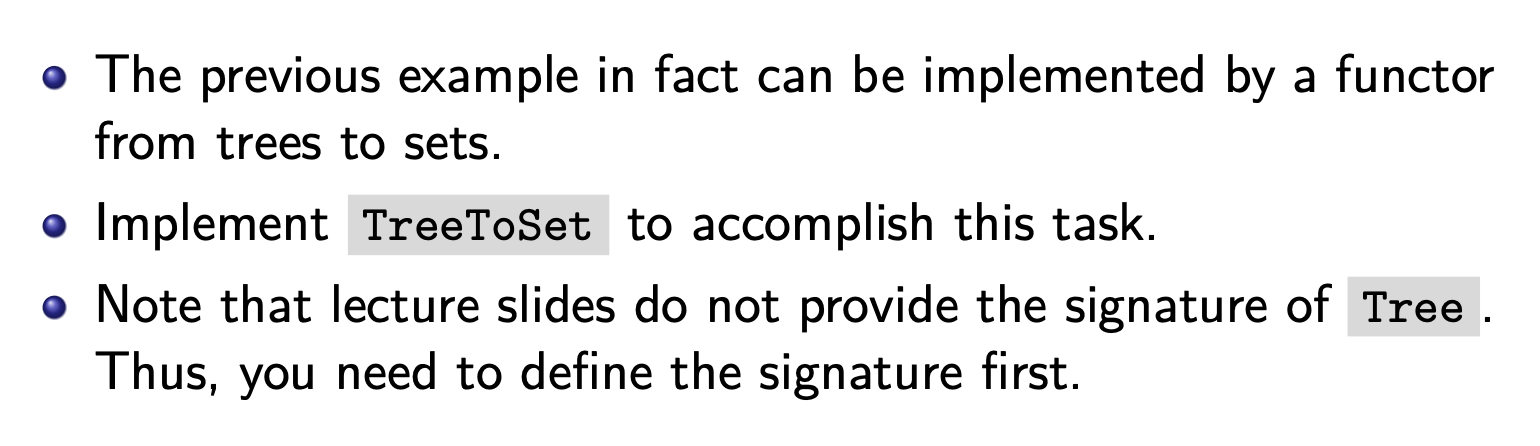

In [23]:
module type Tree = sig 
  type 'a tree 
  exception Insertion_Failure
  val mem : 'a -> 'a tree -> bool 
  val insert : 'a -> 'a tree -> 'a tree 
end;;

type color = Red | Black;;
type 'a rbtree = Leaf | Node of color * 'a * 'a rbtree * 'a rbtree ;;

module RBTree : Tree with 
  type 'a tree = 'a rbtree = struct 
    type 'a tree = 'a rbtree
    exception Insertion_Failure
    let rec mem e = function 
      | Leaf -> false
      | Node (c, v, l, r) -> 
        if e = v then true 
        else if e < v then mem e l 
        else mem e r 
    let rebalance = function 
      | Black, n2, Node(Red, n1, Node(Red, n0, a, b), c), d 
      | Black, n2, Node(Red, n0, a, Node(Red, n1, b, c)), d 
      | Black, n0, a, Node(Red, n1, b, Node(Red, n2, c, d))
      | Black, n0, a, Node(Red, n2, Node(Red, n1, b, c), d)
        -> Node(Red, n1, Node(Black, n0, a, b), Node(Black, n2, c, d))
      | c, n, l, r -> Node(c, n, l, r)
    let rec ins_helper e = function 
      | Leaf -> Node(Red, e, Leaf, Leaf)
      | Node(c, v, l, r) ->
        if e < v then 
          rebalance(c, v, ins_helper e l, r)
        else if e > v then 
          rebalance(c, v, l, ins_helper e r) 
        else Node(c, v, l, r) 
    let insert e n = 
      match ins_helper e n with 
      | Node(_, v, l, r) -> Node(Black, v, l, r)
      | _ -> raise Insertion_Failure 
  end;;


module TreeToSet (ATree : Tree) = struct 
  type 'a set = 'a ATree.tree 
  let empty = Leaf 
  let membership = ATree.mem 
  let add = ATree.insert 
  exception Cannot_Del_RBT 
  let del e s = raise Cannot_Del_RBT 
  let rec union s1 = function 
  | Leaf -> s1
  | Node(_, v, l, r) -> add v (union (union s1 l) r) 
end;;

module RBTSet = TreeToSet(struct
  type 'a tree = 'a RBTree.tree
  exception Insertion_Failure = RBTree.Insertion_Failure
  let mem = RBTree.mem
  let insert = RBTree.insert
end)
  

module RBTSet = TreeToSet(RBTree)

module type Tree =
  sig
    type 'a tree
    exception Insertion_Failure
    val mem : 'a -> 'a tree -> bool
    val insert : 'a -> 'a tree -> 'a tree
  end


type color = Red | Black


type 'a rbtree = Leaf | Node of color * 'a * 'a rbtree * 'a rbtree


module RBTree :
  sig
    type 'a tree = 'a rbtree
    exception Insertion_Failure
    val mem : 'a -> 'a tree -> bool
    val insert : 'a -> 'a tree -> 'a tree
  end


module TreeToSet :
  functor (ATree : Tree) ->
    sig
      type 'a set = 'a ATree.tree
      val empty : 'a rbtree
      val membership : 'a -> 'a ATree.tree -> bool
      val add : 'a -> 'a ATree.tree -> 'a ATree.tree
      exception Cannot_Del_RBT
      val del : 'a -> 'b -> 'c
      val union : 'a ATree.tree -> 'a rbtree -> 'a ATree.tree
    end


module RBTSet :
  sig
    type 'a set = 'a RBTree.tree
    val empty : 'a rbtree
    val membership : 'a -> 'a RBTree.tree -> bool
    val add : 'a -> 'a RBTree.tree -> 'a RBTree.tree
    exception Cannot_Del_RBT
    val del : 'a -> 'b -> 'c
    val union : 'a RBTree.tree -> 'a rbtree -> 'a RBTree.tree
  end


module RBTSet :
  sig
    type 'a set = 'a RBTree.tree
    val empty : 'a rbtree
    val membership : 'a -> 'a RBTree.tree -> bool
    val add : 'a -> 'a RBTree.tree -> 'a RBTree.tree
    exception Cannot_Del_RBT
    val del : 'a -> 'b -> 'c
    val union : 'a RBTree.tree -> 'a rbtree -> 'a RBTree.tree
  end
